# Preprocesamiento de los datos

In [ ]:
from utils import *
coco_to_masks("data/sample/annotations.json", "data/sample/images", "data/sample/masks")

In [ ]:
from utils import *
fix_coco_ids("../data/annotations.json", "../data/annotations_fixed.json")

✅ JSON corregido guardado en ../data/annotations_fixed.json


In [1]:
from utils import *
coco_to_masks("../data/annotations.json", "../data/images", "../data/masks")

loading annotations into memory...
Done (t=0.13s)
creating index...
index created!
Procesando imágenes y anotaciones...
204.jpg → 15 anotaciones → máscara generada
121.jpg → 14 anotaciones → máscara generada
364.jpg → 17 anotaciones → máscara generada
332.jpg → 12 anotaciones → máscara generada
311.jpg → 16 anotaciones → máscara generada
231.jpg → 13 anotaciones → máscara generada
196.jpg → 17 anotaciones → máscara generada
182.jpg → 13 anotaciones → máscara generada
500.jpg → 18 anotaciones → máscara generada
128.jpg → 18 anotaciones → máscara generada
126.jpg → 17 anotaciones → máscara generada
188.jpg → 14 anotaciones → máscara generada
307.jpg → 19 anotaciones → máscara generada
320.jpg → 14 anotaciones → máscara generada
123.jpg → 14 anotaciones → máscara generada
29.jpg → 23 anotaciones → máscara generada
499.jpg → 19 anotaciones → máscara generada
309.jpg → 16 anotaciones → máscara generada
525.jpg → 14 anotaciones → máscara generada
367.jpg → 15 anotaciones → máscara generada
1

# Procesamiento

✅ Dataset cargado: 10 pares imagen/máscara
✅ Dataset cargado: 10 pares imagen/máscara
IoU medio: 0.0139
Dice medio: 0.0001


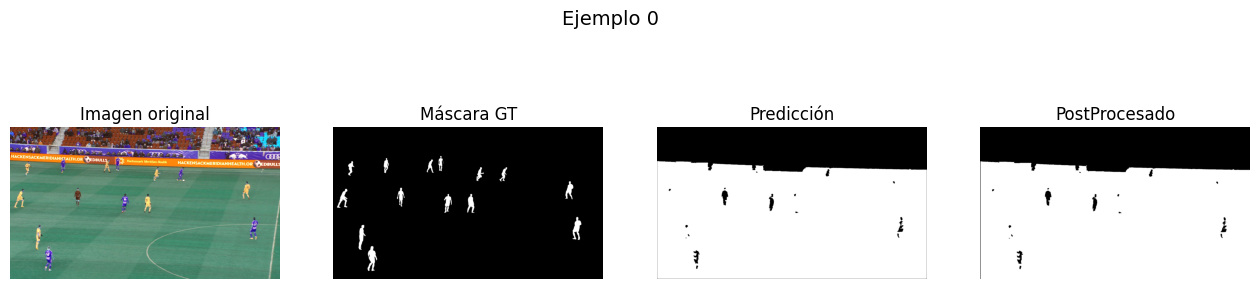

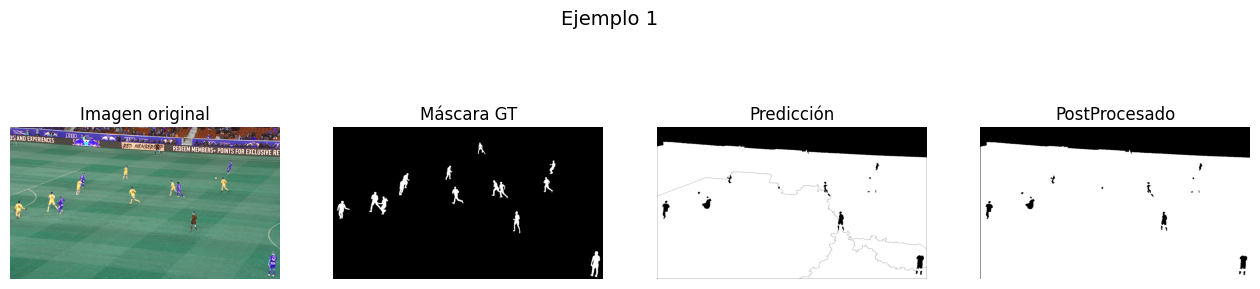

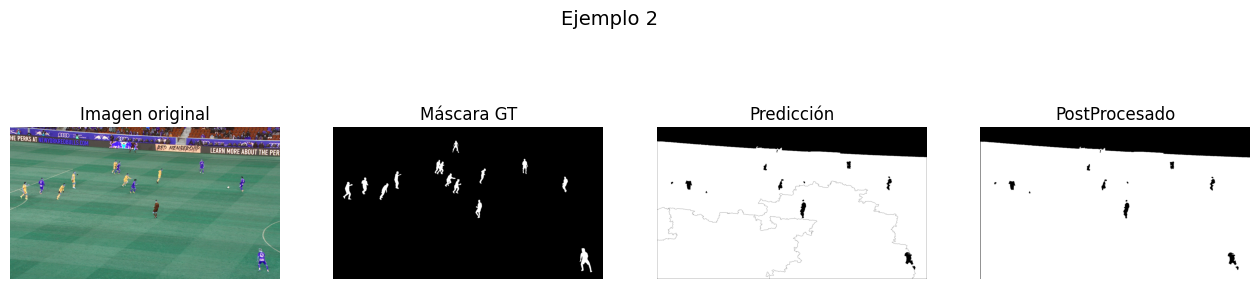

In [4]:
# main.py
import numpy as np
from utils import load_dataset, visualize_sample
from classical import run_segmenters
from evaluation import iou_score, dice_score
from postprocessing import postprocess_mask
from preprocessing import preprocess_image
from pretrained import segment_players

def main():
    # ========================
    # 1. Cargar dataset
    # ========================
    images_dir = "../data/images"
    masks_dir = "../data/masks"
    n_samples = 10

    images, masks_gt = load_dataset(images_dir, masks_dir, n_samples)
    print(f"✅ Dataset cargado: {len(images)} pares imagen/máscara")

    # Preprocesado
    # images = [preprocess_image(img, resize_factor=0.5) for img in images]
    # masks_gt = [preprocess_image(img, resize_factor=0.5) for img in masks_gt]

    # ========================
    # 2. Ejecutar segmentadores
    # ========================
    # masks_pre = [segment_players(img, threshold=0.7) for img in images]
    masks_pre = run_segmenters(images, method="watershed", k=4 , space="hsv")  #hsv/lab
    # Puedes cambiar method=["otsu", "kmeans", "watershed", "canny"]

    masks_pred = [postprocess_mask(mask, min_area=150) for mask in masks_pre]
    # ========================
    # 3. Evaluar resultados
    # ========================
    iou_vals, dice_vals = [], []
    for gt, pred in zip(masks_gt, masks_pred):
        iou_vals.append(iou_score(gt, pred))
        dice_vals.append(dice_score(gt, pred))

    print(f"IoU medio: {np.mean(iou_vals):.4f}")
    print(f"Dice medio: {np.mean(dice_vals):.4f}")

    # ========================
    # 4. Visualización de ejemplos
    # ========================
    # Visualizar los primeros 3 ejemplos
    for idx in range(min(3, len(images))):
        visualize_sample(images[idx], masks_gt[idx], masks_pre[idx],masks_pred[idx], idx=idx)

if __name__ == "__main__":
    main()
